In [1]:
import pandas as pd
import numpy as np
import operator
import json

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
class LinearRegression:
    theta = None
    
    def predict(self, X):
        Y_pred = np.dot(X,self.theta.T)
        return Y_pred
    
    def compute_error(self, y_pred, y_actual, regularization_method, l):
        m = len(y_actual)
        error = (1.0/float(m))*np.sum((y_pred-y_actual)*(y_pred-y_actual))
        reg_term = 0
        if regularization_method == 'lasso':
            reg_term = np.sum(np.abs(self.theta))
        if regularization_method == 'ridge':
            reg_term = np.sum(np.square(self.theta))
            
        error = error + (l*reg_term)
        return error
    
    def compute_gradient(self, X, h, Y,regularization_method,l):
        m = len(Y)
        grad = (2.0/float(m))*np.sum(X*(h-Y), axis=0)
        reg_term = 0
        if regularization_method == 'lasso':
            reg_term = np.sum(np.divide(self.theta,np.abs(self.theta)))
        if regularization_method == 'ridge':
            reg_term = 2*np.sum(self.theta)
            
        grad = grad + (l*reg_term)
        return grad
    
    def train(self, X, y, alpha, max_epochs, regularization_method,l):
        self.theta = None
        self.theta = np.random.rand(1,X_train.shape[1])
        m = len(X_train)
        its = list()
        errs = list()
        for i in range(0,max_epochs):
#             X = X_train.values
            h = np.dot(X,self.theta.T)
#             Y = y_train.values
            self.theta = self.theta - alpha*self.compute_gradient(X,h,y,regularization_method,l)
            
            y_pred = np.dot(X,self.theta.T)
            err = self.compute_error(y_pred,y, regularization_method,l)
            its.append((i+1))
            errs.append(err)
        return (its,errs)
            

In [3]:
def train_data(X_train, y_train, X_test, y_test):
    ln_mse = LinearRegression()
    its_mse,errs_mse = ln_mse.train(X_train,y_train,0.1, 100,'ridge',0.01)
    y_train_pred_mse = ln_mse.predict(X_train)
    y_test_pred_mse = ln_mse.predict(X_test)
    train_mse = ln_mse.compute_error(y_train_pred_mse, y_train,'ridge',0.01)
    test_mse = ln_mse.compute_error(y_test_pred_mse, y_test,'ridge',0.01)
    return train_mse,test_mse

In [4]:
data = pd.read_csv("admission_data.csv")
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [5]:
X_pd = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y_pd = data[['Chance of Admit']]
for col in X_pd:
    mean = X_pd[col].mean()
    std = X_pd[col].std()
    X_pd[col] = (X_pd[col] - mean)/std
X_pd['Ones'] = [1]*len(X_pd)
X = X_pd.values
y = y_pd.values
train_errors = list()
test_errors = list()
ks = list()
for k in range(2,201):
    kf = KFold(n_splits=k)
    total_train_error = 0.0
    total_test_error = 0.0
    for train_index,test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        train_mse,test_mse = train_data(X_train,y_train,X_test,y_test)
        total_train_error += train_mse
        total_test_error += test_mse
    total_train_error = total_train_error/k
    total_test_error = total_test_error/k
    train_errors.append(total_train_error)
    test_errors.append(total_test_error)
    ks.append(k)
#     print 'K = '+str(k)
#     print 'Average train error : '+str(total_train_error/k)
#     print 'Average test error : '+str(total_test_error/k)

/home/tarunm/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/tarunm/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


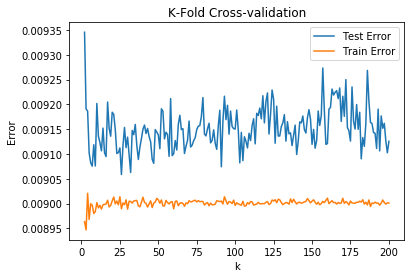

In [6]:
df = pd.DataFrame({'Train Error': train_errors, 'Test Error':test_errors}, index=ks)
lines = df.plot.line()
lines.set_title('K-Fold Cross-validation')
lines.set_xlabel('k')
lines.set_ylabel('Error')